# 4.6. Введение в Объектно-Ориентированное программирование

## 4.6.1 Основы объектно-ориентированного программирования

        Стили структурного программирования в обобщенном смысле можно разделить на две категории: процедурное и объектно-ориентированное. Программы, которые рассматривались в этой книге до настоящего момента, по своей сущности были процедурными: мы писали функции (которые в других языках обычно называют процедурами или подпрограммами), эти функции вызывались, в них передавались данные, они возвращали значения, полученные в результате внутренних вычислений. Функции, которые мы определяли, не хранят собственные данные и не запоминают свое состояние между вызовами. После определения функции не изменялись.
        Другой парадигмой программирования, которая стала широко распространенной благодаря использованию таких языков, как C++ и Java, является объектно-ориентированное программирование (object-oriented programming). В таком контексте объект представляет концепцию некоторого рода: это может быть физическая сущность, но также возможно представление в виде абстрактного набора компонентов, связанных друг с другом семантически согласованным способом. Объект хранит данные о самом себе (атрибуты) и определяет функции (методы) для обработки данных. Обработка данных может приводить к изменению состояния объекта (т. е. могут измениться некоторые атрибуты объекта). Объект создается (точнее, создается экземпляр класса) из «черновика», называемого классом (class), который обусловливает поведение объекта, определяя его атрибуты и методы.
        В действительности мы уже имели дело с объектно-ориентированным программированием, потому что в Python все является объектами. Например, строка Python – это экземпляр класса str. Объект str содержит собственные данные (последовательность символов, составляющих строку) и предоставляет («предъявляет») группу методов для обработки этих данных. Например, метод capitalize возвращает новый строковый объект, созданный из исходной строки посредством перевода ее первой буквы в верхний регистр (преобраование в заглавную, или прописную, букву). Метод split возвращает список строк, полученных в результате разделения исходной строки:

In [2]:
a = 'hello, aloha, goodbye, aloha'
a.capitalize()
a.split(',')

['hello', ' aloha', ' goodbye', ' aloha']

    Даже простое обращение по индексу на самом деле представляет собой вызов метода __getitem__():

In [3]:
b = [10,20,30,40,50]
b.__getitem__(4)

50

    Таким образом, выражение a[4] равнозначно выражению a.__getitem__ (4)51.
    Широкое распространение объектно-ориентированного программирования, по крайней мере для крупных проектов, в определенной степени обусловлено способом, помогающим разработать концепцию задачи, которую должна решить программа. Часто имеется возможность разделить общую глобальную задачу на компоненты данных и операции, которые должны выполняться с этими данными. Например, банк, обслуживающий физических лиц, работает с людьми, имеющими счета в этом банке. Естественный объектно-ориентированный подход к управлению банком должен заключаться в определении класса BankAccount с такими атрибутами, как номер счета, баланс, владелец, и второго класса Customer с такими атрибутами, как имя, адрес и дата рождения. Класс BankAccount может иметь методы для разрешения (или запрещения) транзакций в зависимости от баланса клиента, а класс Customer может, например, содержать методы для вычисления возраста клиента по дате его рождения (см. рис. 4.2).

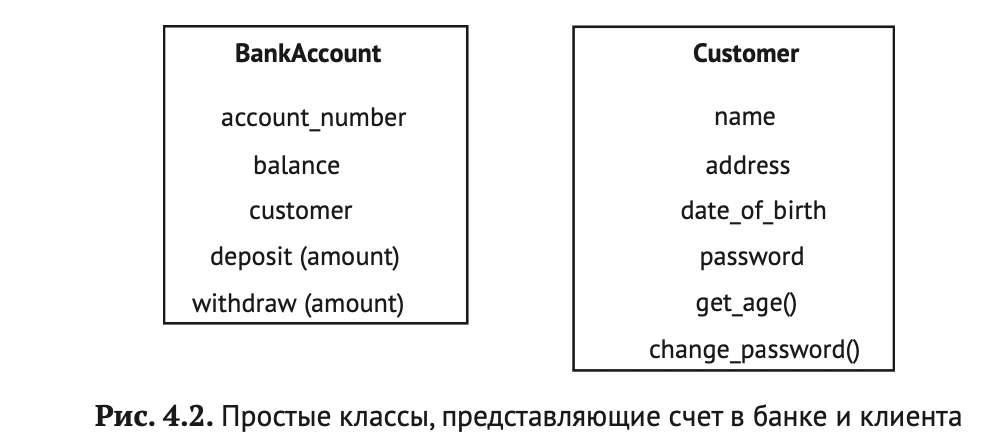

        Важным аспектом объектно-ориентированного программирования является наследование (inheritance). Часто между объектами существуют взаимоотношения в форме иерархии. Обычно обобщенный тип объекта определяется базовым классом, затем от него производятся (наследуются) специализированные классы с более специфической функциональностью. В рассматриваемом здесь примере с банком могут существовать различные типы банковских счетов: накопительные, текущие (чековые) и т. д. Каждый такой счет является производным от обобщенного основного банковского счета, для которого можно просто определить главные атрибуты, такие как баланс и номер счета. Более специализированные классы банковского счета наследуют (inherit) свойства базового класса, но могут также изменять их, замещая (переопределяя) один или несколько методов, а также добавлять собственные атрибуты и методы. Подобный подход помогает структурировать программу и поощряет многократное использование кода (code reuse) – нет необходимости отдельно объ- являть атрибут «номер счета» для накопительных и текущих счетов, поскольку оба класса автоматически унаследовали этот атрибут от базового класса. Если не создается экземпляр самого базового класса, но он служит только в качест- ве шаблона для производных классов, то такой базовый класс называется абстрактным классом (abstract class).

        На рис. 4.3 показано отношение между базовым классом и двумя производными подклассами. Базовый класс BankAccount определяет некоторые атрибуты (account_number, balance и customer) и методы (такие как deposit и withdraw), общие для всех типов счетов. Эти атрибуты и методы наследуются подклассами. Подкласс SavingsAccount добавляет атрибут и метод для обработки выплат по процентной ставке для этого типа счета. Подкласс CurrentAccount, в свою очередь, добавляет два атрибута, описывающих ежегодную оплату счета и лимит по транзакции снятия денег, а также замещает (переопределяет) метод базового класса withdraw, возможно, для проверки превышения лимита перед разрешением операции снятия денег со счета.

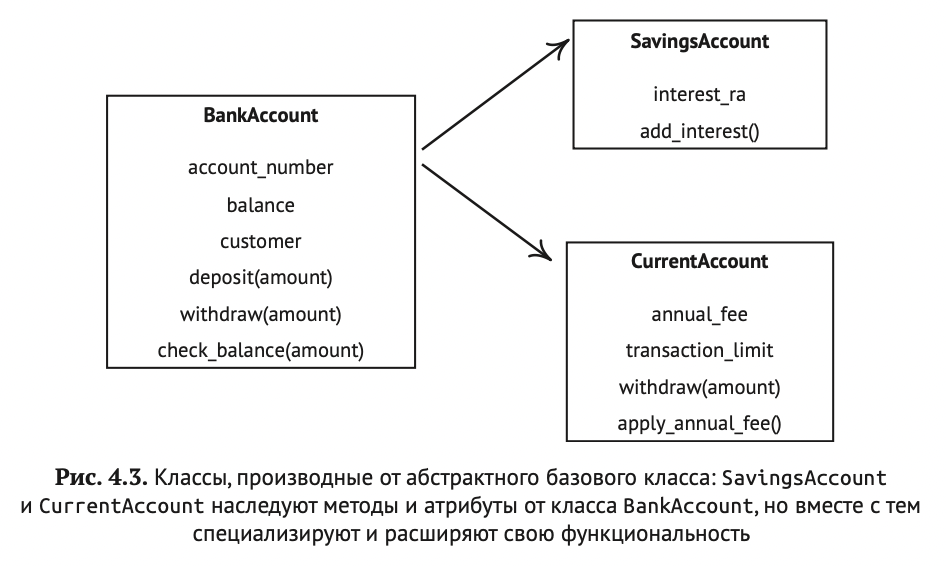

## 4.6.2 Определение и использовние классов в Python

        Класс определяется с помощью ключевого слова class и со сдвигом вправо в теле класса инструкций (атрибутов и методов) в блоке, следующем за строкой объявления класса. Существует соглашение, по которому имена классов записываются в стиле CamelCase. Правильный практический прием: за интсрукцией объявления class следует строка объявления class следует строка документации docstring, описывающая, что делает этот класс. Методы класса определяются с помощью уже знакомого ключевого слова def, но первым аргументом каждого метода должна быть переменная с именем self - это имя используется для ссылки на сам объект, когда необходимо вызвать собственные методы, или для обращения к атрибутам, как мы увидим в дальнейшнем.
            В рассматриваемом здесь примере с банковским счетом базовый класс можно определить, как показано на рисунке 4.6.

**Листинг 4.6** Определение абстрактного базового класса BankAccount

In [20]:
class BankAccount:
    """An abstract base class representing a bank account"""
    """Абстрактный базовый класс, представляющий банковский счет"""
    currency = '$'
    
    def __init__(self,customer,account_number,balance = 0):
    #"""Initialize the BankAccount class with a cuustomer, account number and opening balance (which defaults to 0.) """
    #"""Иницилизация класса BankAccount значениями имени клиента, номера счета и баланса при открытии счета (по умолчанию 0)"""
        self.customer = customer
        self.account_number = account_number
        self.balance = balance
    def deposit(self,amount):
        if amount >0:
            self.balance  += amount
        else:
            print('Invalid deposit amount:',amount)
    def withdraw(self,amount):
        
        if amount > 0:
            if amount > self.balance:
                print('Insufficient funds')
            else:
                self.balance -= amount
        else:
            print('Invalid withdrawal amount',amount)

        Для практического использования этого простого класса можно сохранить исходный код его определения в файл bank_account.py и импортировать этот файл в новую поограмму или в интерактивную командную оболочку Python следующей командой:
        # from bank_account import BankAccount
    Теперь новая программа может создавать объекты BankAccount и работать с ними, вызывая методы, описанные в листинге 4.6.

## Создание экземпляра класса

        Экземпляр класса создается с помощью синтаксической конструкции object = ClassName(args). Может потребоваться создание экземпляра класса, который должен инициализировать сам себя некоторым способом (возможно, установкой соответствующих значений для атрибутов). Такая инициализация выполняется специализированным методом __init__(), который принимает любые аргументы args, заданные в инструкции инициализации. 
        В рассматриваемом здесь примере счет открывается при создании объекта BankAccount с передачей в него имени владельца счета(клиента), номера счета и (необязательно) баланса при открытии счета (если это значение не задано, то по умолчанию присвается 0)

In [23]:
my_account = BankAccount('Joe',21457288)

    Мы заменим строку customer на Customer  в примере П.4.18.

## Методы и атрибуты

        Рассматриваемый здесь класс, определяет два метода: один для вклада (положительной) денежной суммы, второй для снятия денег (если снимаемая сумма задана как положительное число и не превышает баланс счета)
                Класс BankAccount содержит два различных типа атрибутов: self.customer, self.account_number и self.balance, - переменные экземпляра класса (instance variable) - они могут содержать различные значения в различных объектах, созданных из класса BankAccount.  К другому типу атрибутов относится переменная currency - это переменная класса (class variable): она определена внутри класса, но вне какого либо из его методов, поэтому совместно используется экземплярами этого класса.
                Доступ к атрибутам и методам осуществляется с использованием нотации object.attr. Например:

In [37]:
my_account.account_number #Доступ к атрибуту класса my_account
my_account.deposit(64) #Вызов метода класса my_account
my_account.balance 

640

    Добавим третий метод для вывода баланса счета. Этот метод обязательно должен быть определен внутри блока кода класса:
    

In [42]:
class BankAccount:
    """An abstract base class representing a bank account"""
    """Абстрактный базовый класс, представляющий банковский счет"""
    currency = '$'
    
    def __init__(self,customer,account_number,balance = 0):
    #"""Initialize the BankAccount class with a cuustomer, account number and opening balance (which defaults to 0.) """
    #"""Иницилизация класса BankAccount значениями имени клиента, номера счета и баланса при открытии счета (по умолчанию 0)"""
        self.customer = customer
        self.account_number = account_number
        self.balance = balance
    def deposit(self,amount):
        if amount >0:
            self.balance  += amount
        else:
            print('Invalid deposit amount:',amount)
    def withdraw(self,amount):
        
        if amount > 0:
            if amount > self.balance:
                print('Insufficient funds')
            else:
                self.balance -= amount
        else:
            print('Invalid withdrawal amount',amount)    
    def check_balance(self):
        print('The balance of account number {:d} is {:s}{:.2f}'.format(self.account_number,self.currency, self.balance))

    **Пример 4.18.**
            Теперь определим класс Customer, описанный в диаграмме классов на рис 4.2: экземпляр этого класса будет атрибутом customer в классе BankAccount. Обратите внимание: была возможность создать экземпляр класса BankAccount, передавая в атрибут customer строковой литерал. Это следствие динамической типизации языка Python: Проверка типа не выполняется автоматически при передаче объекта как аргумента в конструктор класса, поэтому можно передавать объект любого корректного типа.

In [53]:
from datetime import datetime
class Cusotmer:
    def __init__(self,name,address,date_of_birth):
        self.name = name
        self.address = address
        self.date_of_birth = datetime.strptime(date_of_birth,'%Y-%m-%d')
        self.password = '1234'
        
    def get_age(self):
        today = datetime.today()
        try:
            birthday = self.date_of_birth.replace(year = today.year)
        except ValueError:
            birhday = self.date_of_birth.replace(year = today.year, day = self.date_of_birth - 1)
        if birthday > today:
            return today.year - self.date_of_birth.year -1
        return today.year - self.date_of_birth.year